# Heart Disease v Smoking

In this project, we collected data from Kaggle (https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset) and we will be using Machine Learning to predict whether or not a patient could suffer a Heart Disease, and we will evaluate the impact of smoking to it.

### Import libraries

Let's first import all the necessary libraries. We'll use `numpy` and `pandas` to start with. For visualization, we use `pyplot` subpackage of `matplotlib`, use `rcParams` to add styling to the plots and `rainbow` for colors. For implementing Machine Learning models and processing of data, we use `sklearn` library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'numpy'

For processing the data, we'll import a few libraries. To split the available dataset for testing and training, we'll use the `train_test_split` method. To scale the features, we are using `StandardScaler`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Next, we'll import the Machine Learning algorithm we'll be using: Random Forest Classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Importing dataset

Now that we have all the libraries we will need, we can import the dataset and take a look at it. The dataset is stored in the file `cardio_train.csv`. We'll use pandas `read_csv` method to read the data.

In [ ]:
dataset = pd.read_csv('cardio_train.csv', delimiter = ';')

# drop the 'id' column from the dataframe
dataset = dataset.drop('id', axis=1)

The dataset is now loaded into the variable `dataset`. We'll just take a glimpse of the data using the `describe()` and `info()` methods before we actually start processing and visualize it.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


So from that info, we can see that the dataset contains 70 thousand lines, with 12 features. We will be focusing in the 'smoke' and 'active' compared to the 'cardio' which is the presence or absence of a cardiovascular disease.

In [ ]:
dataset.describe()
print(dataset.columns)

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


If age looks strange, is because it is counted by days. Not the best in my opinion, but it gives us more a more specific view towards the age. 

### Understanding the data

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

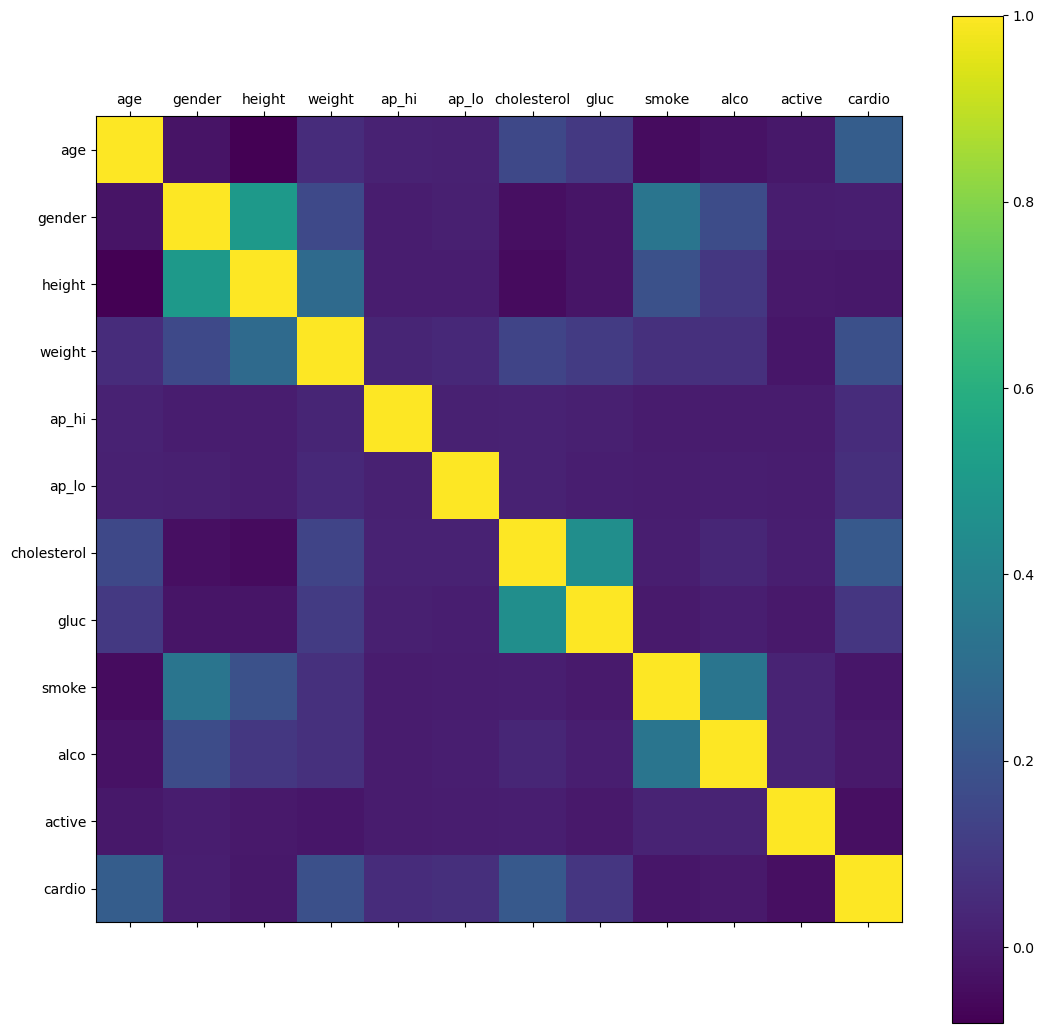

In [ ]:
rcParams['figure.figsize'] = 20, 13
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>],
       [<AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>,
        <AxesSubplot:title={'center':'cardio'}>]], dtype=object)

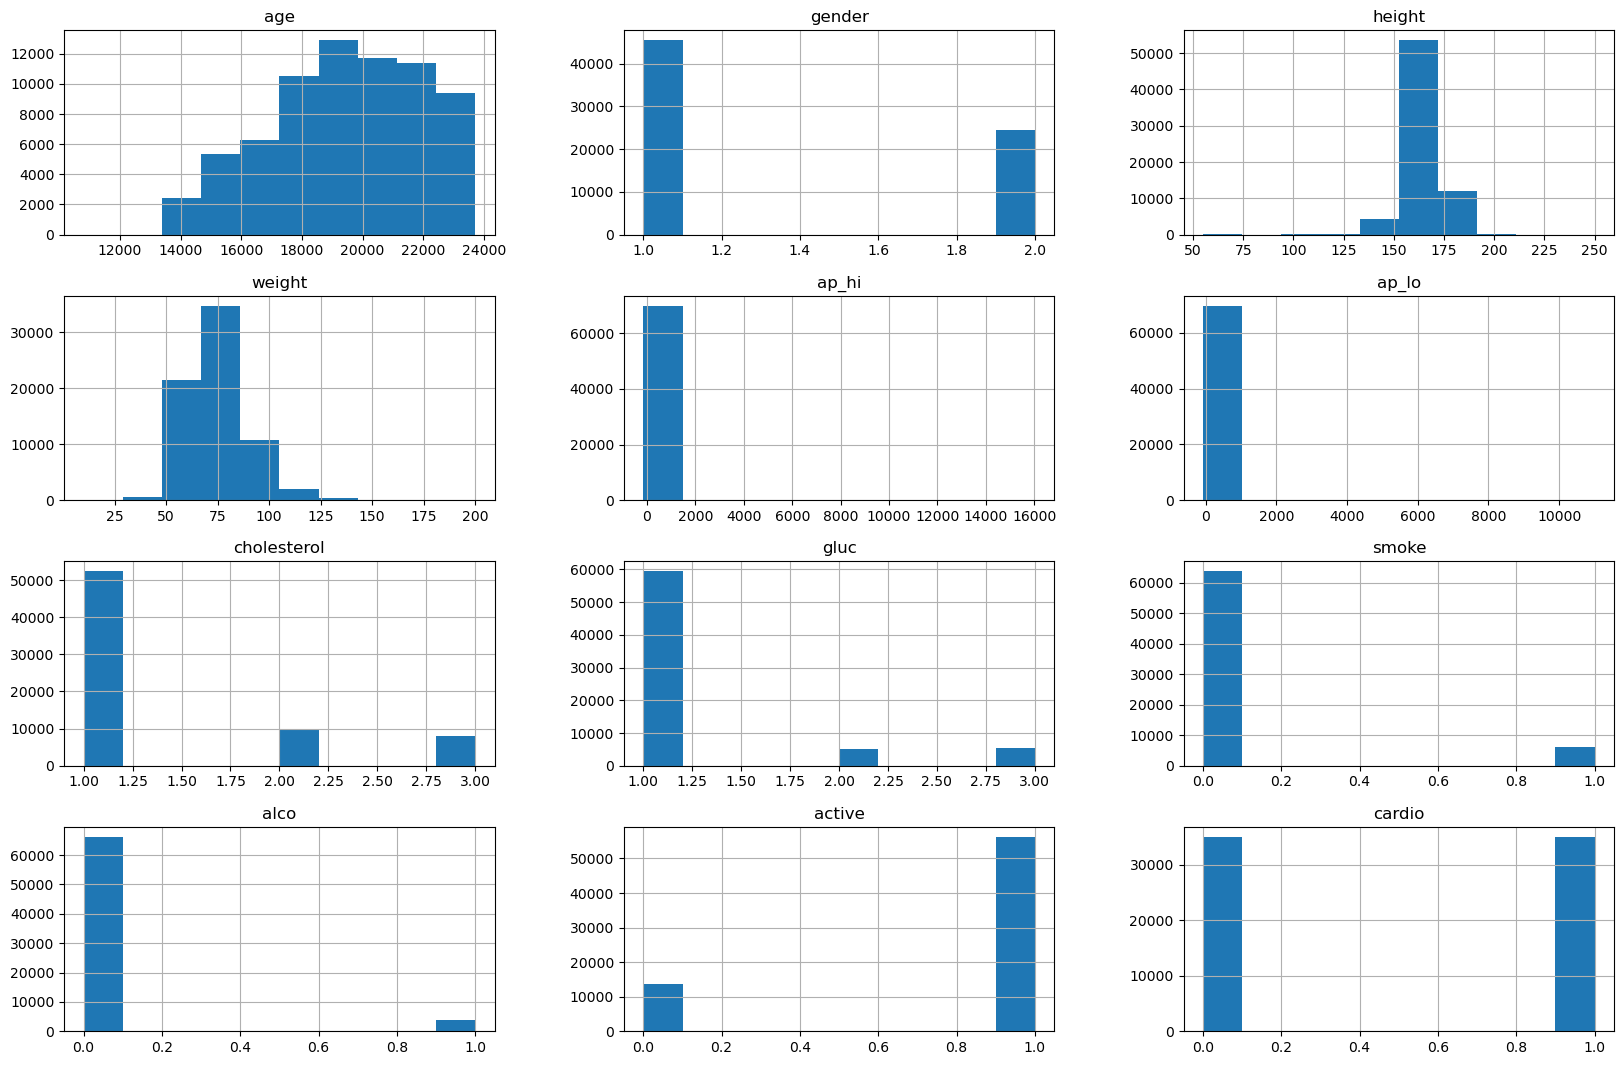

In [ ]:
dataset.hist()

0    35021
1    34979
Name: cardio, dtype: int64


Text(0.5, 1.0, 'Count of each Cardio Class')

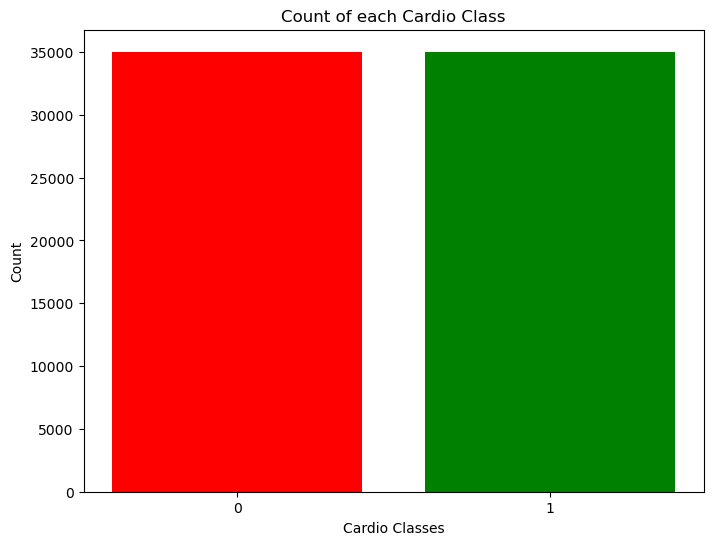

In [ ]:
print(dataset['cardio'].value_counts())

rcParams['figure.figsize'] = 8,6
plt.bar(dataset['cardio'].unique(), dataset['cardio'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Cardio Classes')
plt.ylabel('Count')
plt.title('Count of each Cardio Class')

In [ ]:
print(dataset.columns)


Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
# One-hot encode categorical variables only
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
dataset = pd.get_dummies(dataset, columns=categorical_cols)

# Apply feature scaling to continuous variables only
continuous_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
ss = StandardScaler()
dataset[continuous_cols] = ss.fit_transform(dataset[continuous_cols])


Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

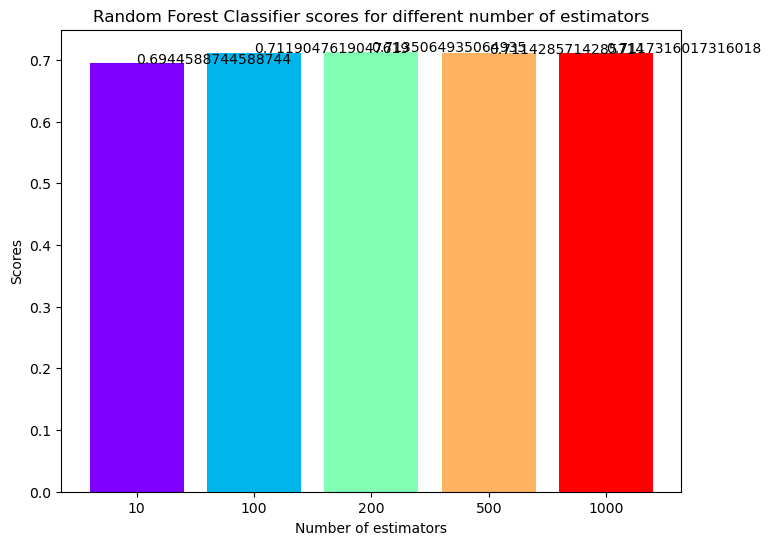

In [ ]:
y = dataset['cardio']
X = dataset.drop(['cardio'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))


colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [ ]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 71.19047619047619% with [100, 500] estimators.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict


y_pred = cross_val_predict(rf_classifier, X, y, cv=5, method="predict_proba")[:, 1]

print("Precision Score: ", precision_score(y, y_pred))